In [48]:
from sklearn.linear_model import RidgeClassifier
from sklearn.datasets import make_classification

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

train= pd.read_csv(r'C:/Users/Melanie/Downloads/trainWP.csv')
# print (df)
test= pd.read_csv(r'C:/Users/Melanie/Downloads/testWP.csv')

x_train= train.drop('Potability', axis=1)
y_train=train['Potability']

# print(x_train)
x_test= test.drop('Potability', axis=1)
y_test= test['Potability']

scaler=StandardScaler()

x_train_s= scaler.fit_transform(x_train)
x_test_s= scaler.transform(x_test)


alphas= [0.000001, 0.000005,0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005,0.01, 1,10, 100, 500, 1000, 10000, 1000000]

for r in alphas:
    rc= RidgeClassifier(alpha=r, normalize=True)
    rc.fit(x_train_s, y_train)
    ypredict= rc.predict(x_test_s)
    score= rc.score(x_test_s, y_test)
#     accuracy_sc= metrics.accuracy_score(y_test, ypredict)
    print("Alpha:{}  Accuracy:{:6f}".format(r, score))
    


Alpha:1e-06  Accuracy:0.626524
Alpha:5e-06  Accuracy:0.626524
Alpha:1e-05  Accuracy:0.626524
Alpha:5e-05  Accuracy:0.626524
Alpha:0.0001  Accuracy:0.626524
Alpha:0.0005  Accuracy:0.626524
Alpha:0.001  Accuracy:0.626524
Alpha:0.005  Accuracy:0.626524
Alpha:0.01  Accuracy:0.626524
Alpha:1  Accuracy:0.637195
Alpha:10  Accuracy:0.637195
Alpha:100  Accuracy:0.637195
Alpha:500  Accuracy:0.637195
Alpha:1000  Accuracy:0.637195
Alpha:10000  Accuracy:0.637195
Alpha:1000000  Accuracy:0.637195


0.6265243902439024
[[402  16]
 [229   9]]
              precision    recall  f1-score   support

           0       0.64      0.96      0.77       418
           1       0.36      0.04      0.07       238

    accuracy                           0.63       656
   macro avg       0.50      0.50      0.42       656
weighted avg       0.54      0.63      0.51       656



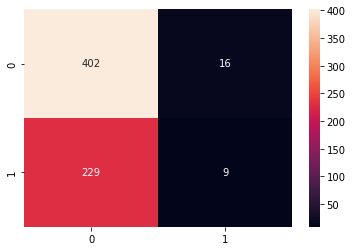

In [47]:
rc= RidgeClassifier(alpha=0.001, normalize=True)
rc.fit(x_train_s, y_train)
rc.score(x_test_s, y_test)

y_predict=rc.predict(x_test_s)
accuracy= metrics.accuracy_score(y_test, y_predict)
print(accuracy)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cf_matrix=confusion_matrix(y_test, y_predict)
print(cf_matrix)
sns.heatmap(cf_matrix, fmt='d', annot = True)

print(classification_report(y_test, y_predict))


In [3]:
# # Print confusion matrix
# y_predict= rc.predict(x_test)
# cf_matrix= confusion_matrix(y_test, y_predict)
# print(cf_matrix)
# # sns.heatmap(cf_matrix, fmt='d', annot = True)